
<font color='red' size='5'> Exercise 1:Implement K-Nearest Neighbor (KNN) (car Dataset)</font>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("car.csv")
df.head(10)


,buying,maint,doors,persons,lug_boot,safety,class_values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [45]:
df.tail(10)

,buying,maint,doors,persons,lug_boot,safety,class_values
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [46]:
def buying_maint(value):
    if value=='vhigh':
        return 4
    elif value=='high':
        return 3
    elif value=='med':
        return 2
    else:
        return 1


In [47]:
df['buying'] = df['buying'].apply(buying_maint)
df['maint'] = df['maint'].apply(buying_maint)


In [48]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,small,low,unacc
1,4,4,2,2,small,med,unacc
2,4,4,2,2,small,high,unacc
3,4,4,2,2,med,low,unacc
4,4,4,2,2,med,med,unacc


In [49]:
def door(value):
    if value == '5more':
        return 5
    elif value=='more':
        return 5
    else:
        return value  

In [50]:
df['doors'] = df['doors'].apply(door) 
df['persons'] = df['persons'].apply(door)

In [51]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,1,1,5,5,med,med,good
1724,1,1,5,5,med,high,vgood
1725,1,1,5,5,big,low,unacc
1726,1,1,5,5,big,med,good
1727,1,1,5,5,big,high,vgood


In [52]:
def lug_safety(value):
    if value=='low':
        return 1
    elif value=='med':
        return 2
    elif value =='high':
        return 3

In [53]:
df['safety'] = df['safety'].apply(lug_safety)

In [54]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,small,1,unacc
1,4,4,2,2,small,2,unacc
2,4,4,2,2,small,3,unacc
3,4,4,2,2,med,1,unacc
4,4,4,2,2,med,2,unacc


In [55]:
def lug_boots(value):
    if value=='small':
        return 1
    elif value=='med':
        return 2
    elif value =='big':
        return 3

In [56]:
df['lug_boot'] = df['lug_boot'].apply(lug_boots)


In [57]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [58]:
def resultant(value):
    if value =='unacc':
        return 0
    elif value == 'acc':
        return 1
    elif value=='good':
        return 2
    elif value =='vgood':
        return 3

In [59]:
df['class_values'] = df['class_values'].apply(resultant)

In [60]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class_values
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2
1727,1,1,5,5,3,3,3


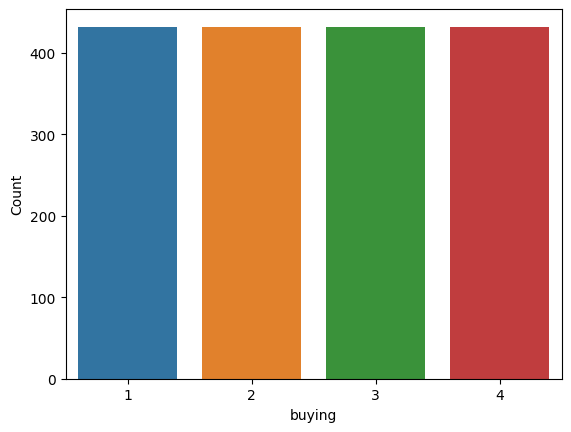

buying
4    432
3    432
2    432
1    432
Name: count, dtype: int64

In [85]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
sns.countplot(x="buying", data=df)
plt.xlabel("buying")
plt.ylabel("Count")
plt.show()
df.loc[:,'buying'].value_counts()


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df.drop('class_values',axis=1)
Y= df['class_values']

In [63]:
X

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,5,2,2
1724,1,1,5,5,2,3
1725,1,1,5,5,3,1
1726,1,1,5,5,3,2


In [64]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class_values, Length: 1728, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [66]:
len(X_train)

1209

In [67]:
len(X_test)

519

In [68]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1545,1,2,3,2,3,1
336,4,1,2,4,2,1
1635,1,1,2,4,3,1
91,4,4,5,4,1,2
1710,1,1,5,4,1,1
...,...,...,...,...,...,...
338,4,1,2,4,2,3
1205,2,1,2,4,3,3
345,4,1,2,5,2,1
437,3,4,2,2,2,3


In [69]:
X_test

,buying,maint,doors,persons,lug_boot,safety
1522,1,2,2,4,1,2
1313,1,4,2,4,3,3
625,3,3,5,2,2,2
1043,2,3,4,4,3,3
632,3,3,5,4,1,3
...,...,...,...,...,...,...
258,4,2,3,4,3,1
1519,1,2,2,2,3,2
1642,1,1,2,5,2,2
204,4,3,5,4,3,1


In [70]:
y_train

1545    0
336     0
1635    0
91      0
1710    0
       ..
338     1
1205    3
345     0
437     0
1664    3
Name: class_values, Length: 1209, dtype: int64

In [71]:
y_test

1522    1
1313    1
625     0
1043    1
632     1
       ..
258     0
1519    0
1642    1
204     0
1368    0
Name: class_values, Length: 519, dtype: int64

In [72]:
from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=42)

In [74]:
knn.score(X_test,y_test)

0.905587668593449

In [75]:
knn.predict([[1,1,5,5,2,2]])

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)


<font color='red' size='5'> Confusion Matrix</font>

In [76]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[347,   6,   0,   0],
       [ 17, 105,   1,   0],
       [  0,  12,   8,   0],
       [  0,  10,   3,  10]], dtype=int64)

**you can measure the quality of predictions from a K-Nearest Neighbors (KNN) classifier using metrics like Accuracy, Precision, Recall, F1-Score, ROC-AUC, or a Confusion Matrix. The choice of metric depends on your specific classification task and the importance of false positives and false negatives in your application.**

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       353
           1       0.79      0.85      0.82       123
           2       0.67      0.40      0.50        20
           3       1.00      0.43      0.61        23

    accuracy                           0.91       519
   macro avg       0.85      0.67      0.72       519
weighted avg       0.91      0.91      0.90       519




<font color='red' size='5'> Exercise 2: Determination of Optimal Value of K in KNN algorithm</font>

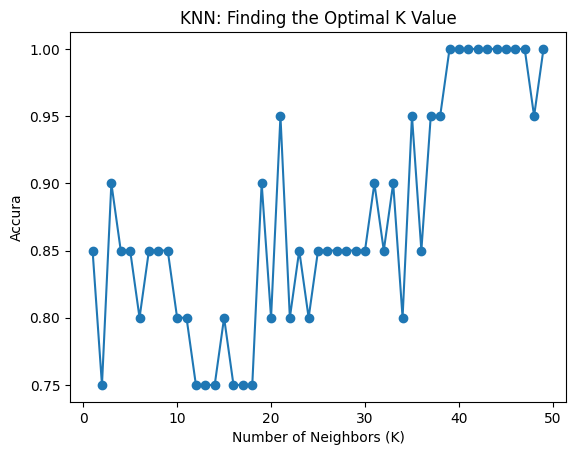

,buying,maint,doors,persons,lug_boot,safety,class_values
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Generate a sample dataset for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # A simple classification task

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Range of K values to test
k_values = range(1, 50)
scores = []

# Iterate over different K values and evaluate the model
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the results to find the optimal K value
plt.figure()
plt.plot(k_values, scores, marker='o')
plt.title('KNN: Finding the Optimal K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accura')
plt.show()
df.head()

In [79]:
from sklearn.neighbors import KNeighborsClassifier 
knn= KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=42)

In [199]:
knn.score(X_test,y_test)

1.0


<font color='red' size='5'>Exercise 3: Compare KNN algorithm with other Variants of Nearest Neighbor Learning 
</font>

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Train and weighted evaluate KNN
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# Train and evaluate Decision Trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

# Train and evaluate Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

# Present the comparison
print("Method            Accuracy   F1-Score")
print(f"KNN (n_neighbors=42)    {knn_accuracy:.2f}      {knn_f1:.2f}")
print(f"Decision Trees          {dt_accuracy:.2f}      {dt_f1:.2f}")
print(f"SVM                    {svm_accuracy:.2f}      {svm_f1:.2f}")


Method            Accuracy   F1-Score
KNN (n_neighbors=42)    1.00      1.00
Decision Trees          0.80      0.80
SVM                    0.90      0.90
